# Explore the El Nino Data

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics

# Scikit Learn with Clustering
import sklearn
from sklearn.cluster import KMeans

## Read data

In [2]:

# Read the data in which is about 178,000 observations
df = pd.read_table("tao-all2.dat", sep= " ", names = ["observation", "year", "month", "day", "date",
                                                      "latitude", "longitude", "zonal winds", "meridional winds",
                                                      "relative humidity", "air temp", "sea temp"])

In [3]:
df.head()

,observation,year,month,day,date,latitude,longitude,zonal winds,meridional winds,relative humidity,air temp,sea temp
0,1,80,3,7,800307,-0.02,-109.46,-6.8,0.7,.,26.14,26.24
1,2,80,3,8,800308,-0.02,-109.46,-4.9,1.1,.,25.66,25.97
2,3,80,3,9,800309,-0.02,-109.46,-4.5,2.2,.,25.69,25.28
3,4,80,3,10,800310,-0.02,-109.46,-3.8,1.9,.,25.57,24.31
4,5,80,3,11,800311,-0.02,-109.46,-4.2,1.5,.,25.3,23.19


In [4]:
df.tail()

,observation,year,month,day,date,latitude,longitude,zonal winds,meridional winds,relative humidity,air temp,sea temp
178075,178076,98,6,11,980611,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14
178076,178077,98,6,12,980612,8.96,-140.32,-4.3,-3.3,93.2,25.8,27.87
178077,178078,98,6,13,980613,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93
178078,178079,98,6,14,980614,8.96,-140.33,-4.9,-2.3,76.2,27.36,28.03
178079,178080,98,6,15,980615,8.95,-140.33,.,.,.,27.09,28.09


Important to note that this dataset used the period as the way to indicate missing values. 

From looking at the head or tail, maybe zonal or meriodonal winds or relative humidity is missing alot.

According to the dataset's page, relative humidity is very consistent, so not much worry if that is missing. Every other variable is crucial, however.

## Clean missing values

In [5]:
nullRows = 0
nullRowlist = []
for ind in df.index: # iterate over rows
    if df['sea temp'][ind] == "." or df['air temp'][ind] == "." or df['zonal winds'][ind] == "." \
    or df['meridional winds'][ind] == ".":
        nullRows = nullRows + 1
        nullRowlist.append(ind)
        
print(nullRows)
    

47824


47824 isn't alot given over 178,000 so I think it is good to remove them

In [6]:
# remove rows
df = df.drop(labels=nullRowlist, axis=0)
df.shape

(130256, 12)

Missing values elsewhere?

In [7]:
nullRows = 0
for ind in df.index: # iterate over rows
    if df['year'][ind] == "." or df['month'][ind] == "." or df['latitude'][ind] == "." or \
    df['day'][ind] == "." or df['date'][ind] == "." or df['longitude'][ind] == ".":
        nullRows = nullRows + 1
        
print(nullRows)

0


Wow no missing values in the other variables, that is great news!

### Set missing humidity values to the average value

In [8]:
avg = 0; count = 0;
for ind in df.index:
    if df['relative humidity'][ind] != ".":
        avg = avg + float(df['relative humidity'][ind])
        count = count + 1
avg = round(avg/count, 2)
df.loc[df['relative humidity'] == ".", 'relative humidity'] = avg
df.head()

,observation,year,month,day,date,latitude,longitude,zonal winds,meridional winds,relative humidity,air temp,sea temp
0,1,80,3,7,800307,-0.02,-109.46,-6.8,0.7,81.33,26.14,26.24
1,2,80,3,8,800308,-0.02,-109.46,-4.9,1.1,81.33,25.66,25.97
2,3,80,3,9,800309,-0.02,-109.46,-4.5,2.2,81.33,25.69,25.28
3,4,80,3,10,800310,-0.02,-109.46,-3.8,1.9,81.33,25.57,24.31
4,5,80,3,11,800311,-0.02,-109.46,-4.2,1.5,81.33,25.3,23.19


In [9]:
type(df['air temp'][2])

str

Notice how the columns with missing values were string type. So change them to float

In [10]:
df = df.astype({"zonal winds": float, "meridional winds": float, "relative humidity": float, \
                "air temp": float, "sea temp": float,})

## Create new variables

In [11]:
# Date ranges based on history and literature
# between May of 1982 and November of 1983
# between April of 1997 and September of 1998

df['El Nino'] = ((df['date'] > 820500) & (df['date'] < 831100)) | ((df['date'] > 970400) & (df['date'] < 980900))

df.tail()

,observation,year,month,day,date,latitude,longitude,zonal winds,meridional winds,relative humidity,air temp,sea temp,El Nino
178074,178075,98,6,10,980610,8.95,-140.33,-6.8,-5.3,81.3,27.52,28.17,True
178075,178076,98,6,11,980611,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14,True
178076,178077,98,6,12,980612,8.96,-140.32,-4.3,-3.3,93.2,25.80,27.87,True
178077,178078,98,6,13,980613,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93,True
178078,178079,98,6,14,980614,8.96,-140.33,-4.9,-2.3,76.2,27.36,28.03,True


## Subset the data

In [12]:
elNinoYes = df[df["El Nino"] == True]
elNinoNo = df[df["El Nino"] == False]

In [13]:
df['El Nino'].value_counts()

False    109550
True      20706
Name: El Nino, dtype: int64

In [14]:
# arbitrarily choose longitudes that constitute west and east pacific
# Southern hemisphere chosen due to ENSO: El Nino - SOUTHERN Oscillation
westPac = df[((df["longitude"] < -170.0) | (df["longitude"] > 160) & (df["latitude"] < 0.0))]
westPac.shape

(25462, 13)

In [15]:
westElNinoYes = westPac[westPac["El Nino"] == True]
westElNinoNo = westPac[westPac["El Nino"] == False]


In [16]:
eastPac = df[((df["longitude"] < -70.0) & (df["longitude"] > -120) & (df["latitude"] < 0.0))]
eastPac.shape

(15258, 13)

In [17]:
eastElNinoYes = eastPac[eastPac["El Nino"] == True]
eastElNinoNo = eastPac[eastPac["El Nino"] == False]

## Correlations

In [18]:
cols = ['zonal winds', 'meridional winds', 'relative humidity', 'air temp', 'sea temp']

In [19]:
westElNinoYes[cols].corr()

,zonal winds,meridional winds,relative humidity,air temp,sea temp
zonal winds,1.000000,0.233472,-0.086690,0.043850,0.332662
meridional winds,0.233472,1.000000,-0.128155,-0.009540,0.257928
relative humidity,-0.086690,-0.128155,1.000000,-0.361960,-0.311913
air temp,0.043850,-0.009540,-0.361960,1.000000,0.592665
sea temp,0.332662,0.257928,-0.311913,0.592665,1.000000


In [20]:
westElNinoNo[cols].corr()

,zonal winds,meridional winds,relative humidity,air temp,sea temp
zonal winds,1.000000,0.078725,0.120015,0.074081,0.468632
meridional winds,0.078725,1.000000,0.064802,0.026423,0.117449
relative humidity,0.120015,0.064802,1.000000,-0.282458,-0.108572
air temp,0.074081,0.026423,-0.282458,1.000000,0.678374
sea temp,0.468632,0.117449,-0.108572,0.678374,1.000000


In [21]:
eastElNinoYes[cols].corr()

,zonal winds,meridional winds,relative humidity,air temp,sea temp
zonal winds,1.000000,-0.135167,0.237225,0.292030,0.460952
meridional winds,-0.135167,1.000000,-0.035135,-0.169343,-0.158526
relative humidity,0.237225,-0.035135,1.000000,0.106722,0.167549
air temp,0.292030,-0.169343,0.106722,1.000000,0.908786
sea temp,0.460952,-0.158526,0.167549,0.908786,1.000000


In [22]:
eastElNinoNo[cols].corr()

,zonal winds,meridional winds,relative humidity,air temp,sea temp
zonal winds,1.000000,0.006970,0.267405,-0.152929,-0.129172
meridional winds,0.006970,1.000000,-0.032238,-0.088127,-0.085485
relative humidity,0.267405,-0.032238,1.000000,-0.220372,-0.228932
air temp,-0.152929,-0.088127,-0.220372,1.000000,0.977310
sea temp,-0.129172,-0.085485,-0.228932,0.977310,1.000000


## Compare sea temp averages

In [23]:
statistics.mean(westElNinoYes["sea temp"])

29.035140949554897

In [24]:
statistics.mean(westElNinoNo["sea temp"])

29.025096647679522

In [25]:
statistics.mean(eastElNinoYes["sea temp"])

27.452701863354037

In [26]:
statistics.mean(eastElNinoNo["sea temp"])

24.45886462554405

## Compare zonal wind averages

In [27]:
statistics.mean(westElNinoYes["zonal winds"])

-1.329104846686449

In [28]:
statistics.mean(westElNinoNo["zonal winds"])

-2.7371930152208424

In [29]:
statistics.mean(eastElNinoYes["zonal winds"])

-5.016614906832298

In [30]:
statistics.mean(eastElNinoNo["zonal winds"])

-4.711819000450248

## Visualize

Text(0, 0.5, 'sea temperature (°C)')

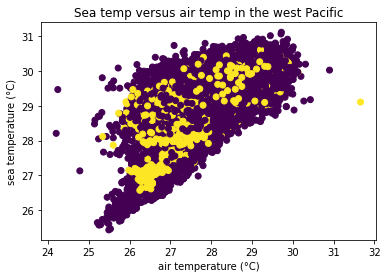

In [31]:
plt.scatter(westPac['air temp'], westPac['sea temp'], c = westPac['El Nino'])
plt.title("Sea temp versus air temp in the west Pacific")
plt.xlabel("air temperature (°C)")
plt.ylabel("sea temperature (°C)")

Text(0, 0.5, 'sea temperature (°C)')

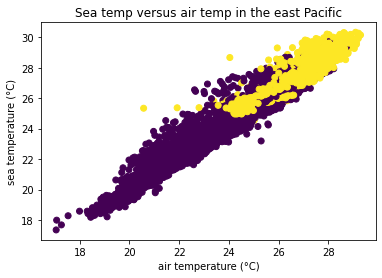

In [32]:
plt.scatter(eastPac['air temp'], eastPac['sea temp'], c = eastPac['El Nino'])
plt.title("Sea temp versus air temp in the east Pacific")
plt.xlabel("air temperature (°C)")
plt.ylabel("sea temperature (°C)")

Text(0, 0.5, 'meridional winds (m/s)')

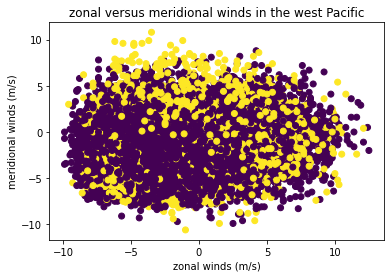

In [33]:
plt.scatter(westPac['zonal winds'], westPac['meridional winds'], c = westPac['El Nino'])
plt.title("zonal versus meridional winds in the west Pacific")
plt.xlabel("zonal winds (m/s)")
plt.ylabel("meridional winds (m/s)")

Text(0, 0.5, 'meridional winds (m/s)')

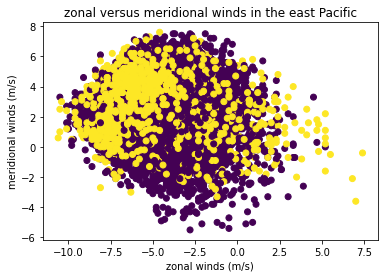

In [34]:
plt.scatter(eastPac['zonal winds'], eastPac['meridional winds'], c = eastPac['El Nino'])
plt.title("zonal versus meridional winds in the east Pacific")
plt.xlabel("zonal winds (m/s)")
plt.ylabel("meridional winds (m/s)")

In [35]:
# heatmap of sea surface temperatures given combinations of date and longitude



## Clustering Models

Text(0.5, 1.0, 'Find the Optimal k')

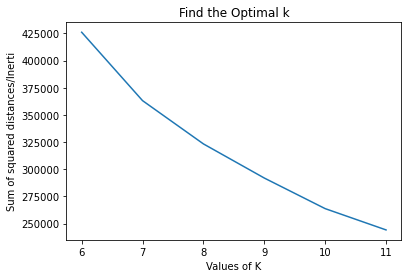

In [36]:
cols = ['zonal winds', 'air temp', 'sea temp']
dfMain = df[cols]

Sum_of_squared_distances = []
K = range(6,12)
for num_clusters in K :
    kmeans = KMeans(n_clusters = num_clusters)
    kmeans.fit(dfMain)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances)
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inerti") 
plt.title("Find the Optimal k")

In [37]:
cols = ['zonal winds', 'air temp', 'sea temp']
K = 3

In [38]:

kmeans = KMeans(n_clusters = K)
y = kmeans.fit_predict(westPac[cols])
westPac['Cluster'] = y

<ipython-input-38-bce03d4a4e2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  westPac['Cluster'] = y


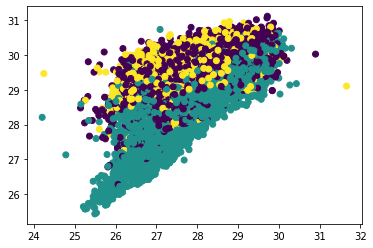

In [39]:
plt.scatter(westPac['air temp'], westPac['sea temp'], c = westPac['Cluster'])

In [40]:
kmeans = KMeans(n_clusters = 3)
y = kmeans.fit_predict(eastPac[cols])
eastPac['Cluster'] = y

<ipython-input-40-5e7bf77375d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eastPac['Cluster'] = y


Text(0, 0.5, 'sea temperature (°C)')

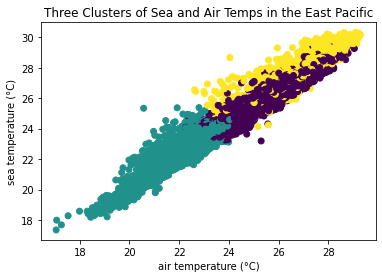

In [41]:
plt.scatter(eastPac['air temp'], eastPac['sea temp'], c = eastPac['Cluster'])
plt.title("Three Clusters of Sea and Air Temps in the East Pacific")
plt.xlabel("air temperature (°C)")
plt.ylabel("sea temperature (°C)")

In [42]:
kmeans = KMeans(n_clusters = 6)
y = kmeans.fit_predict(eastPac[cols])
eastPac['Cluster'] = y

<ipython-input-42-1d9bddc57283>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eastPac['Cluster'] = y


Text(0, 0.5, 'sea temperature (°C)')

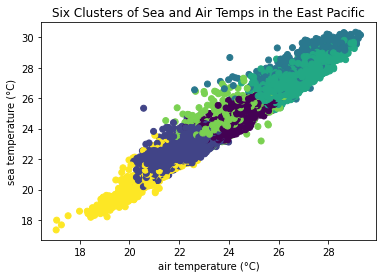

In [43]:
plt.scatter(eastPac['air temp'], eastPac['sea temp'], c = eastPac['Cluster'])
plt.title("Six Clusters of Sea and Air Temps in the East Pacific")
plt.xlabel("air temperature (°C)")
plt.ylabel("sea temperature (°C)")

In [44]:

kmeans = KMeans(n_clusters = K)
y = kmeans.fit_predict(westElNinoYes[cols])
westElNinoYes['Cluster'] = y

<ipython-input-44-3ceb2e01fefd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  westElNinoYes['Cluster'] = y


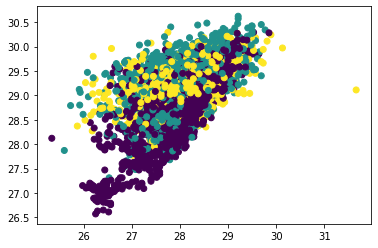

In [45]:
plt.scatter(westElNinoYes['air temp'], westElNinoYes['sea temp'], c = westElNinoYes['Cluster'])

In [46]:

kmeans = KMeans(n_clusters = K)
y = kmeans.fit_predict(westElNinoNo[cols])
westElNinoNo['Cluster'] = y

<ipython-input-46-5bd7e3ae6007>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  westElNinoNo['Cluster'] = y


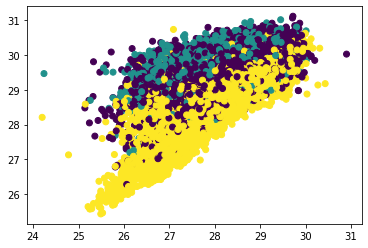

In [47]:
plt.scatter(westElNinoNo['air temp'], westElNinoNo['sea temp'], c = westElNinoNo['Cluster'])

In [48]:

kmeans = KMeans(n_clusters = K)
y = kmeans.fit_predict(eastElNinoYes[cols])
eastElNinoYes['Cluster'] = y

<ipython-input-48-64e7fcca9c02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eastElNinoYes['Cluster'] = y


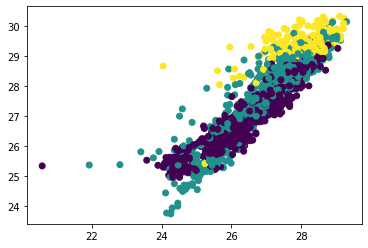

In [49]:
plt.scatter(eastElNinoYes['air temp'], eastElNinoYes['sea temp'], c = eastElNinoYes['Cluster'])

In [50]:

kmeans = KMeans(n_clusters = K)
y = kmeans.fit_predict(eastElNinoNo[cols])
eastElNinoNo['Cluster'] = y

<ipython-input-50-092af420d4d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eastElNinoNo['Cluster'] = y


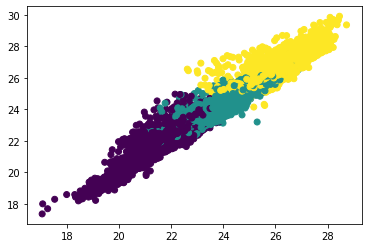

In [51]:
plt.scatter(eastElNinoNo['air temp'], eastElNinoNo['sea temp'], c = eastElNinoNo['Cluster'])

In [52]:
# Save the dataframe for the future
df.to_csv('elNinoDF.csv', header = True, index = False)